In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
df = pd.read_csv('./heart.csv')

In [3]:
print(df['output'].value_counts())

1    165
0    124
Name: output, dtype: int64


In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,56,0,0,120,354,0,1,163,1,0.6,2,0,2,1


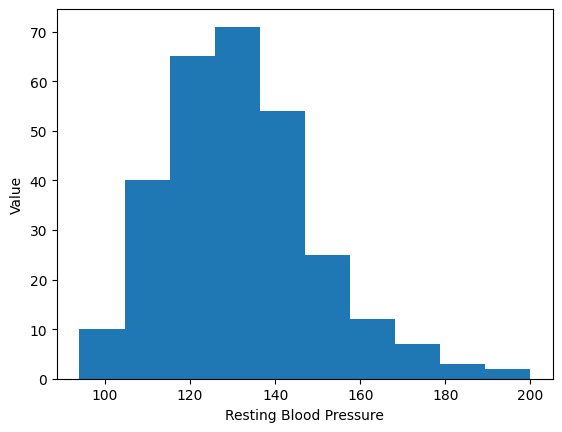

In [5]:
plt.hist(df['trtbps'])
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Value')
plt.show()

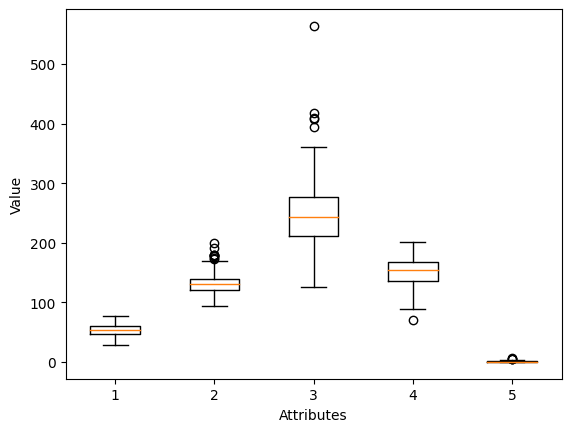

In [6]:
data_to_boxplot = [df['age'], df['trtbps'], df['chol'],
df['thalachh'], df['oldpeak']]
plt.boxplot(data_to_boxplot)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

In [7]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [8]:
training_points = df.drop(columns=['output'])
training_labels = df['output']
X_train, X_test, y_train, y_test = train_test_split(
training_points,
training_labels,
test_size=0.3,
random_state=4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(202, 13)
(202,)
(87, 13)
(87,)


In [9]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)
print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 1 0]
[[12 18]
 [12 45]]
0.6551724137931034


0.7011494252873564


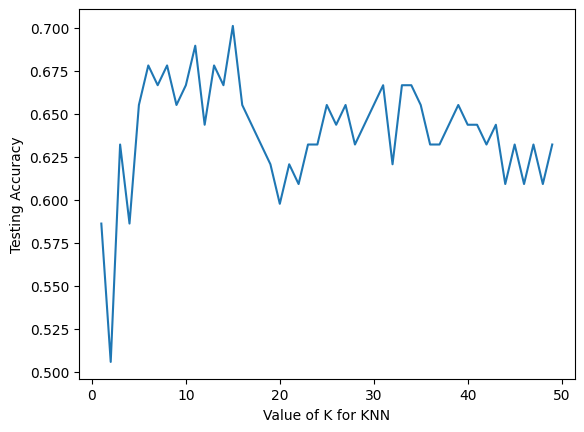

In [10]:
k_range = range(1, 50)
accuracy_scores = []
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
    
print(max(accuracy_scores))
#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [12]:
from sklearn.preprocessing import StandardScaler

#Create copy of dataset.
df_model = df.copy()
#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = StandardScaler()
features = [['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])
    
training_points = df_model.drop(columns=['output'])
training_labels = df_model['output']

X_train, X_test, y_train, y_test = train_test_split(training_points, training_labels, test_size=0.3, random_state=4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(202, 13)
(202,)
(87, 13)
(87,)


In [13]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)
print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 0 1 1 1 0 1 0 0]
[[19 11]
 [ 6 51]]
0.8045977011494253


0.8275862068965517


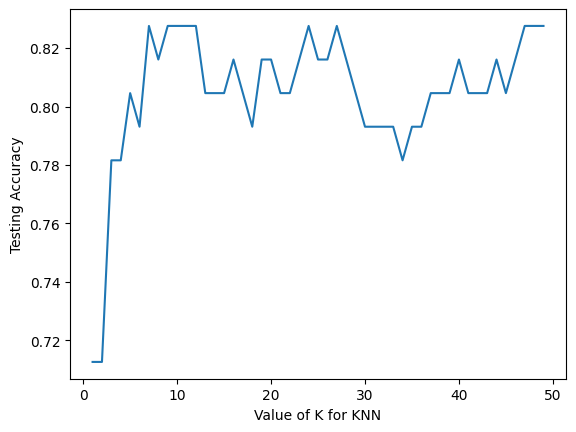

In [14]:
k_range = range(1, 50)
accuracy_scores = []
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
    
print(max(accuracy_scores))
#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

(202, 13)
(202,)
(87, 13)
(87,)
0.8735632183908046


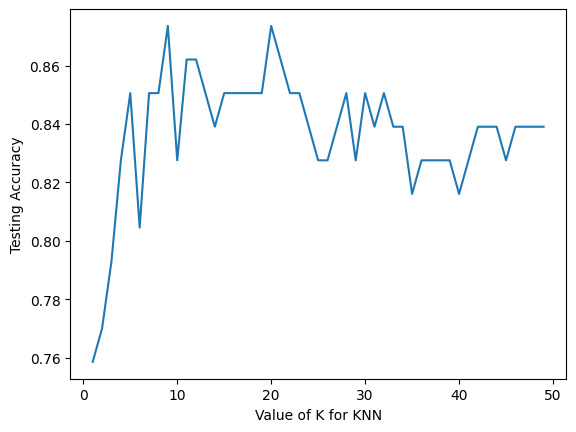

In [15]:
from sklearn.preprocessing import MinMaxScaler

#Create copy of dataset.
df_model = df.copy()
#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = MinMaxScaler()
features = [['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])
    
training_points = df_model.drop(columns=['output'])
training_labels = df_model['output']

X_train, X_test, y_train, y_test = train_test_split(training_points, training_labels, test_size=0.3, random_state=4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

k_range = range(1, 50)
accuracy_scores = []
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
    
print(max(accuracy_scores))
#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

(202, 13)
(202,)
(87, 13)
(87,)
0.8390804597701149


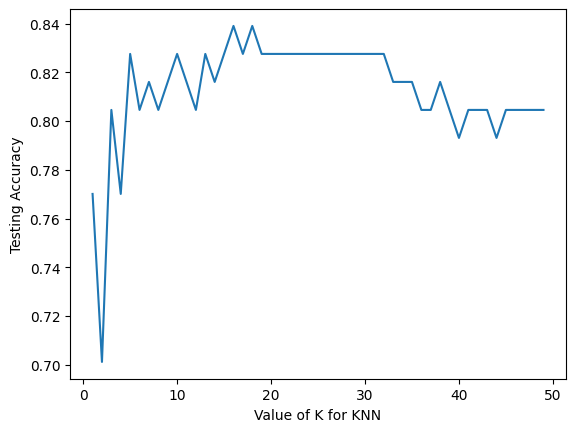

In [16]:
from sklearn.preprocessing import RobustScaler

#Create copy of dataset.
df_model = df.copy()
#Rescaling features age, trestbps, chol, thalach, oldpeak.
scaler = RobustScaler()
features = [['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']]
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])
    
training_points = df_model.drop(columns=['output'])
training_labels = df_model['output']

X_train, X_test, y_train, y_test = train_test_split(training_points, training_labels, test_size=0.3, random_state=4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

k_range = range(1, 50)
accuracy_scores = []
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
    
print(max(accuracy_scores))
#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()